# CREDIT CARD DEFAULTER PREDICTION

In [3]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from tensorflow import keras

import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
TW_data = pd.read_csv('creditcarddefault.csv')
TW_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
TW_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
TW_data.shape

(30000, 25)

In [7]:
TW_data.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  

In [8]:
x = TW_data.iloc[:,1:24].values                 #dependent values

y= TW_data.iloc[:,24].values
print(x)
print(y)

[[ 20000      2      2 ...      0      0      0]
 [120000      2      2 ...   1000      0   2000]
 [ 90000      2      2 ...   1000   1000   5000]
 ...
 [ 30000      1      2 ...   4200   2000   3100]
 [ 80000      1      3 ...   1926  52964   1804]
 [ 50000      1      2 ...   1000   1000   1000]]
[1 1 0 ... 1 1 1]


In [9]:
x.shape

(30000, 23)

In [10]:
y.shape

(30000,)

In [11]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(21000, 23) (9000, 23) (21000,) (9000,)


In [12]:
#scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
x_train[:1]

array([[ 0.33297642,  0.8062477 ,  0.185497  ,  0.85680873, -1.13608334,
        -0.87707896, -0.71958246,  0.13345484,  0.18691652,  0.23177905,
         0.2511706 , -0.68700553, -0.59831126,  0.54037858,  0.4757734 ,
         0.40649414,  0.46071537,  0.52998437,  4.1428771 , -0.16503663,
        -0.16448598, -0.07148892, -0.29440876]])

In [14]:
#Building model using keras

from keras.models import Sequential
from keras.layers import Dense

In [15]:
class_model_keras = Sequential()

In [16]:
#adding layers

class_model_keras.add(Dense(24, input_dim = 23, activation = 'relu'))
class_model_keras.add(Dense(12, activation = 'relu'))

class_model_keras.add(Dense(1, activation = 'sigmoid'))

In [17]:
class_model_keras.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                576       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [18]:
class_model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
class_model_keras.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
2100/2100 [==============================] - 26s 11ms/step - loss: 0.4768 - accuracy: 0.7991
Epoch 2/10
2100/2100 [==============================] - 15s 7ms/step - loss: 0.4438 - accuracy: 0.8165
Epoch 3/10
2100/2100 [==============================] - 14s 7ms/step - loss: 0.4386 - accuracy: 0.8172
Epoch 4/10
2100/2100 [==============================] - 13s 6ms/step - loss: 0.4363 - accuracy: 0.8180
Epoch 5/10
2100/2100 [==============================] - 12s 6ms/step - loss: 0.4346 - accuracy: 0.8170
Epoch 6/10
2100/2100 [==============================] - 13s 6ms/step - loss: 0.4328 - accuracy: 0.8188
Epoch 7/10
2100/2100 [==============================] - 13s 6ms/step - loss: 0.4324 - accuracy: 0.8191
Epoch 8/10
2100/2100 [==============================] - 11s 5ms/step - loss: 0.4300 - accuracy: 0.8195
Epoch 9/10
2100/2100 [==============================] - 11s 5ms/step - loss: 0.4297 - accuracy: 0.8178
Epoch 10/10
2100/2100 [==============================] - 12s 6ms/step - 

In [20]:
y_pred = class_model_keras.predict(x_test) #prediction
y_pred

array([[0.17404899],
       [0.1465374 ],
       [0.09800607],
       ...,
       [0.15505618],
       [0.16200608],
       [0.23410237]], dtype=float32)

In [21]:
pred = (y_pred>0.5)

In [22]:
y_pred[pred]

array([0.7578311 , 0.7170434 , 0.5875555 , ..., 0.6767597 , 0.72119796,
       0.5815418 ], dtype=float32)

In [23]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred)
cf_matrix

array([[6661,  375],
       [1215,  749]], dtype=int64)

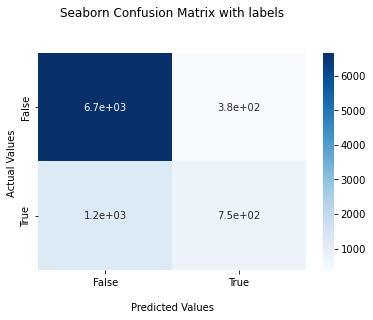

In [24]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [25]:
#conclusion
#model built

In [26]:
scores = class_model_keras.evaluate(x_test , y_test)
print("\nACCURACY: %.2f%%" % (scores[1]*100))

282/282 [==============================] - 2s 5ms/step - loss: 0.4308 - accuracy: 0.8233

ACCURACY: 82.33%
